# Estrutura do trabalho

*  Capa (feito)

*  Introdução (feito)
   
*  Modelos (feito)
   - quais serão usados (MQ, Lasso, Ridge)
   - métricas de avaliação (MSE)

*  Dados
   - listagem (feito)
   - observações relevantes (feito)

*  Resultados (feito)
*  Conclusões (feito)
*  Referências (feito)

# Carregamento, Vizualização e Tratamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## Leitura dados - Vinho tinto

In [2]:
# Carregando os dados:
df= pd.read_csv('https://raw.githubusercontent.com/derSchmetterling/ML2022/main/winequality-red.csv', header=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
(df['quality'] >= 5).value_counts()

True     1536
False      63
Name: quality, dtype: int64

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


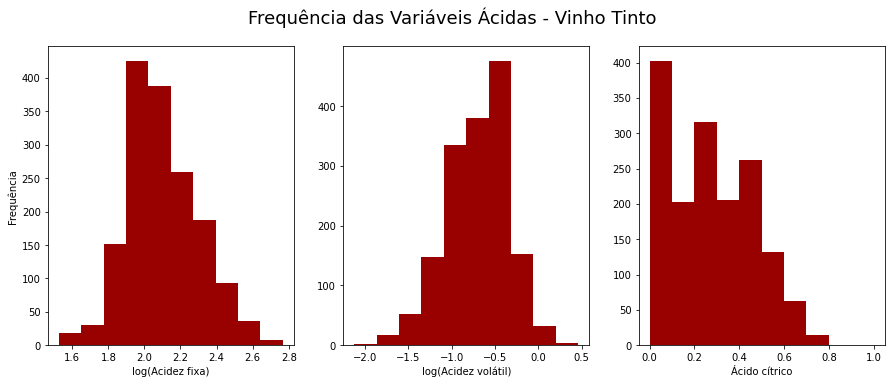

In [5]:
plt.figure(figsize=(15,5.5))

plt.subplot(1,3,1)
plt.hist(np.log(df['fixed acidity']), color='#990000')
plt.xlabel('log(Acidez fixa)')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.hist(np.log(df['volatile acidity']), color='#990000')
plt.xlabel('log(Acidez volátil)')

plt.subplot(1,3,3)
plt.hist(df['citric acid'], color='#990000')
plt.xlabel('Ácido cítrico')

plt.suptitle('Frequência das Variáveis Ácidas - Vinho Tinto', fontsize=18)
plt.show()

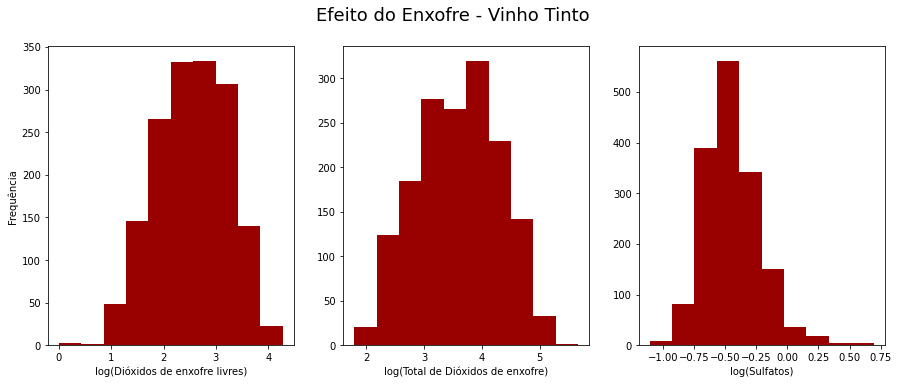

In [6]:
plt.figure(figsize=(15,5.5))

plt.subplot(1,3,1)
plt.hist(np.log(df['free sulfur dioxide']), color='#990000')
plt.xlabel('log(Dióxidos de enxofre livres)')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.hist(np.log(df['total sulfur dioxide']), color='#990000')
plt.xlabel('log(Total de Dióxidos de enxofre)')

plt.subplot(1,3,3)
plt.hist(np.log(df['sulphates']), color='#990000')
plt.xlabel('log(Sulfatos)')

plt.suptitle('Efeito do Enxofre - Vinho Tinto', fontsize=18)
plt.show()

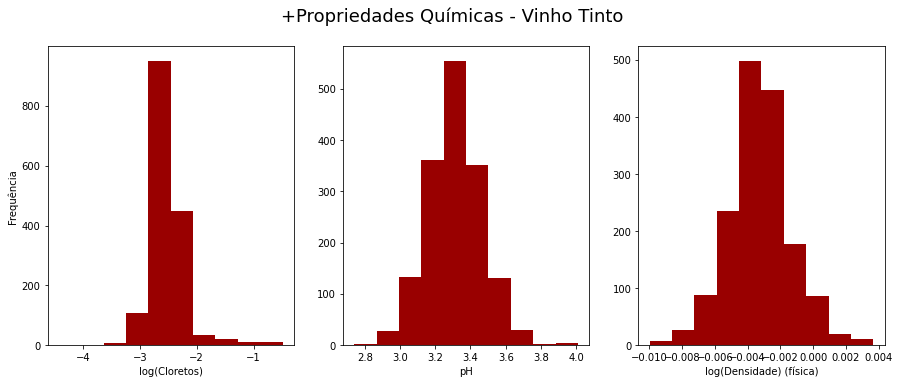

In [7]:
plt.figure(figsize=(15,5.5))

plt.subplot(1,3,1)
plt.hist(np.log(df['chlorides']), color='#990000')
plt.xlabel('log(Cloretos)')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.hist(df['pH'], color='#990000')
plt.xlabel('pH')

plt.subplot(1,3,3)
plt.hist(np.log(df['density']), color='#990000')
plt.xlabel('log(Densidade) (física)')

plt.suptitle("+Propriedades Químicas - Vinho Tinto", fontsize=18)
plt.show()

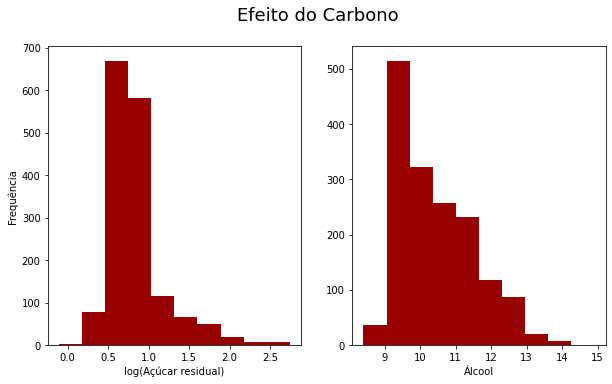

In [8]:
plt.figure(figsize=(10,5.5))

plt.subplot(1,2,1)
plt.hist(np.log(df['residual sugar']), color='#990000')
plt.xlabel('log(Açúcar residual)')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
plt.hist(df['alcohol'], color='#990000')
plt.xlabel('Álcool')

plt.suptitle('Efeito do Carbono', fontsize=18)
plt.show()

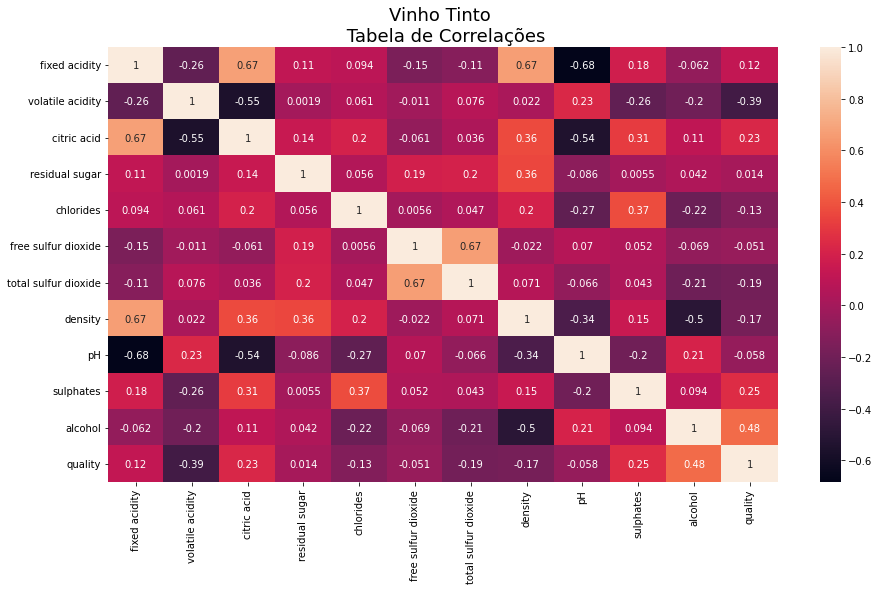

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)
plt.plot()
plt.title('Vinho Tinto \n Tabela de Correlações', fontsize = 18)
plt.show()

## Leitura de dados - Vinho Branco

In [10]:
df_white = pd.read_csv('https://raw.githubusercontent.com/derSchmetterling/ML2022/main/winequality-white.csv', header=0, sep = ';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
(df_white['quality'] >= 5).value_counts()

True     4715
False     183
Name: quality, dtype: int64

In [12]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


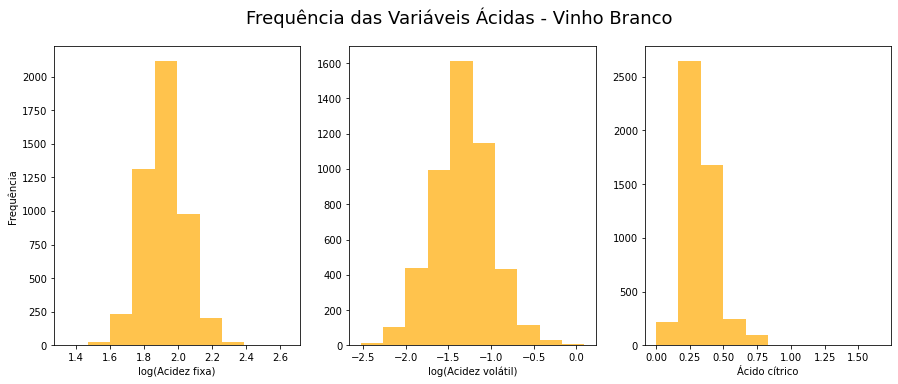

In [13]:
plt.figure(figsize=(15,5.5))

plt.subplot(1,3,1)
plt.hist(np.log(df_white['fixed acidity']), color='#ffc34d')
plt.xlabel('log(Acidez fixa)')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.hist(np.log(df_white['volatile acidity']), color='#ffc34d')
plt.xlabel('log(Acidez volátil)')

plt.subplot(1,3,3)
plt.hist(df_white['citric acid'], color='#ffc34d')
plt.xlabel('Ácido cítrico')

plt.suptitle('Frequência das Variáveis Ácidas - Vinho Branco', fontsize=18)
plt.show()

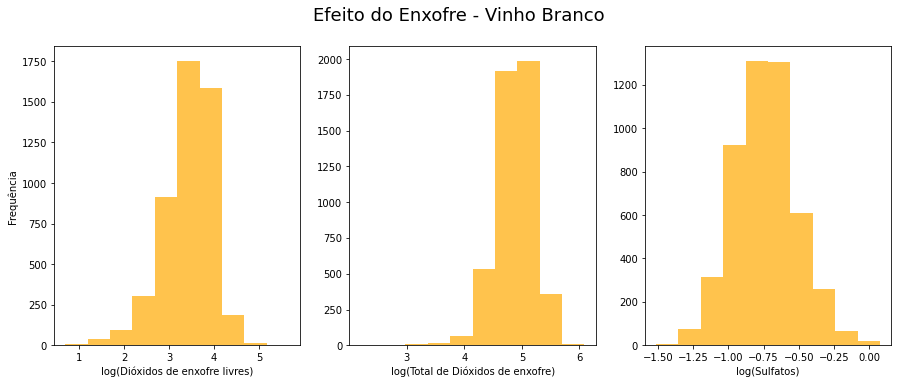

In [14]:
plt.figure(figsize=(15,5.5))

plt.subplot(1,3,1)
plt.hist(np.log(df_white['free sulfur dioxide']), color='#ffc34d')
plt.xlabel('log(Dióxidos de enxofre livres)')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.hist(np.log(df_white['total sulfur dioxide']), color='#ffc34d')
plt.xlabel('log(Total de Dióxidos de enxofre)')

plt.subplot(1,3,3)
plt.hist(np.log(df_white['sulphates']), color='#ffc34d')
plt.xlabel('log(Sulfatos)')

plt.suptitle('Efeito do Enxofre - Vinho Branco', fontsize=18)
plt.show()

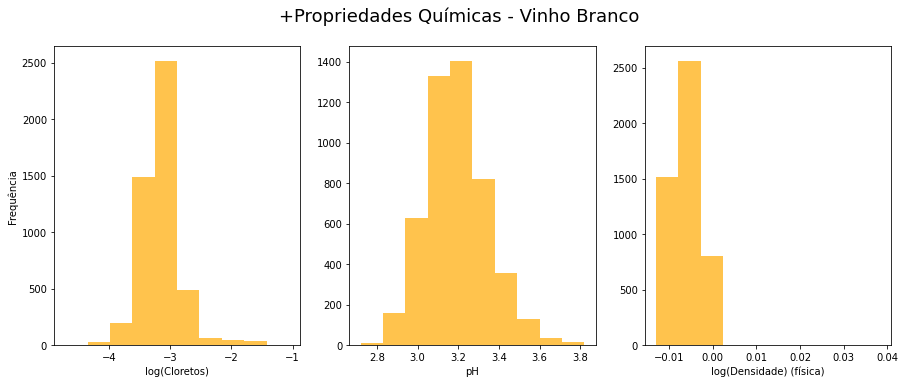

In [15]:
plt.figure(figsize=(15,5.5))

plt.subplot(1,3,1)
plt.hist(np.log(df_white['chlorides']), color='#ffc34d')
plt.xlabel('log(Cloretos)')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.hist(df_white['pH'], color='#ffc34d')
plt.xlabel('pH')

plt.subplot(1,3,3)
plt.hist(np.log(df_white['density']), color='#ffc34d')
plt.xlabel('log(Densidade) (física)')

plt.suptitle("+Propriedades Químicas - Vinho Branco", fontsize=18)
plt.show()

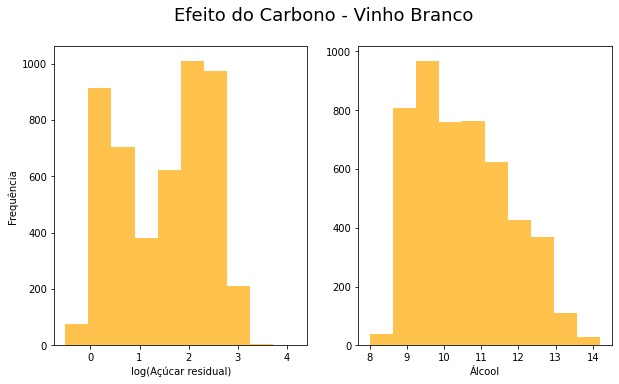

In [16]:
plt.figure(figsize=(10,5.5))

plt.subplot(1,2,1)
plt.hist(np.log(df_white['residual sugar']), color='#ffc34d')
plt.xlabel('log(Açúcar residual)')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
plt.hist(df_white['alcohol'], color='#ffc34d')
plt.xlabel('Álcool')

plt.suptitle('Efeito do Carbono - Vinho Branco', fontsize=18)
plt.show()

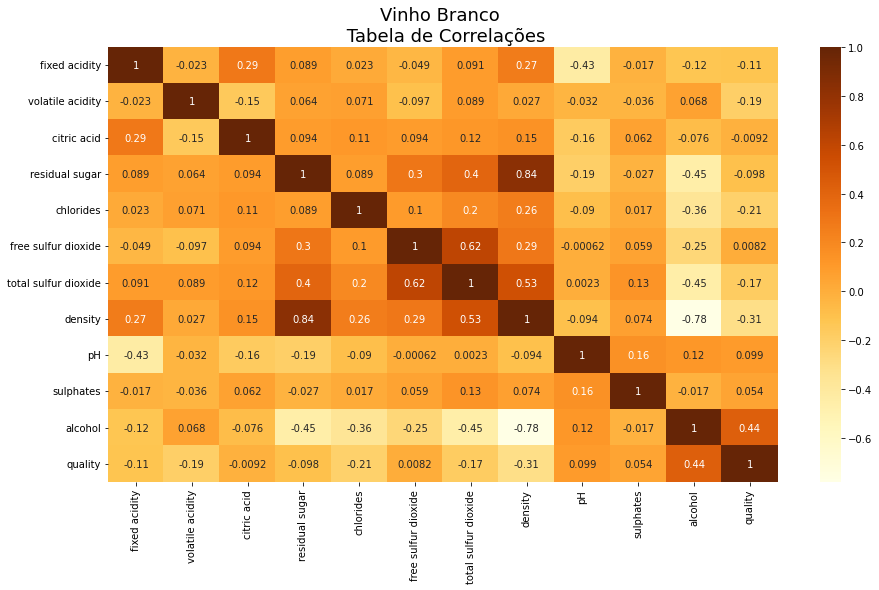

In [17]:
plt.figure(figsize = (15,8))

sns.heatmap(df_white.corr(), annot=True, cmap="YlOrBr")
plt.plot()
plt.title('Vinho Branco \n Tabela de Correlações', fontsize = 18)
plt.show()

Em comparação com o vinho tinto, o vinho branco tem uma maior colinearidade entre o alcool e a densidade.

## Pre-processamento dos Dados

### Vinho Tinto

In [18]:
# Tratamento log
df_trat = df.copy()

log_scale = ['residual sugar', 'chlorides', 'sulphates',
             'total sulfur dioxide', 'free sulfur dioxide',
             'volatile acidity', 'fixed acidity', 'density']

for l in log_scale:
  df_trat[l] = np.log(df_trat[l])
  df_trat.rename(columns={l: 'log '+l}, inplace=True)

df_trat.head()

,log fixed acidity,log volatile acidity,citric acid,log residual sugar,log chlorides,log free sulfur dioxide,log total sulfur dioxide,log density,pH,log sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,-0.002202,3.51,-0.579818,9.4,5
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,-0.003205,3.20,-0.385662,9.8,5
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,-0.003005,3.26,-0.430783,9.8,5
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,-0.002002,3.16,-0.544727,9.8,6
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,-0.002202,3.51,-0.579818,9.4,5


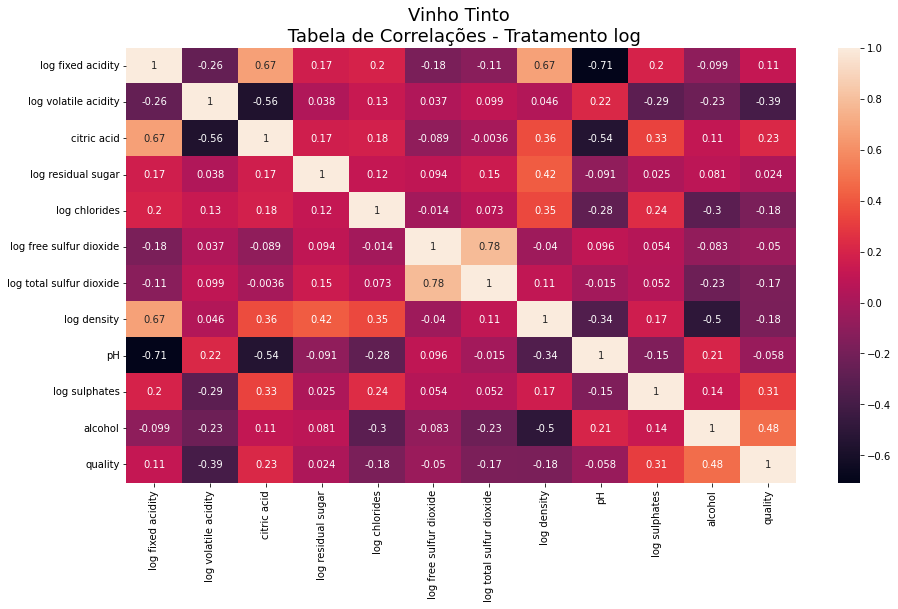

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(df_trat.corr(), annot=True)
plt.plot()
plt.title('Vinho Tinto \n Tabela de Correlações - Tratamento log',
          fontsize = 18)
plt.show()

Só com a transformação log, as correlações não mudaram muito, melhorou um pouco.

In [20]:
# Tratamento Media 0 e Var 1
for mv in df_trat.columns[:-1]:
  df_trat[mv] = (df_trat[mv] - df_trat[mv].mean())/(df_trat[mv].std())

df_trat.head(3)

,log fixed acidity,log volatile acidity,citric acid,log residual sugar,log chlorides,log free sulfur dioxide,log total sulfur dioxide,log density,pH,log sulphates,alcohol,quality
0,-0.485156,0.966521,-1.391037,-0.582968,-0.218695,-0.216312,-0.105418,0.558786,1.288240,-0.601874,-0.959946,5
1,-0.221161,1.613546,-1.391037,0.294535,0.558268,0.981690,0.856219,0.029199,-0.719708,0.266575,-0.584594,5
2,-0.221161,1.199040,-1.185699,-0.048463,0.365188,0.236276,0.550420,0.135159,-0.331073,0.064754,-0.584594,5


In [21]:
print(df_trat.var())
print(df_trat.mean())

log fixed acidity           1.000000
log volatile acidity        1.000000
citric acid                 1.000000
log residual sugar          1.000000
log chlorides               1.000000
log free sulfur dioxide     1.000000
log total sulfur dioxide    1.000000
log density                 1.000000
pH                          1.000000
log sulphates               1.000000
alcohol                     1.000000
quality                     0.652168
dtype: float64
log fixed acidity          -4.088176e-16
log volatile acidity        1.466411e-16
citric acid                -1.066481e-16
log residual sugar          3.199442e-16
log chlorides               5.154656e-16
log free sulfur dioxide     4.976910e-16
log total sulfur dioxide   -1.777468e-16
log density                -3.554936e-17
pH                          2.861723e-15
log sulphates              -7.998605e-17
alcohol                     7.109871e-17
quality                     5.636023e+00
dtype: float64


### Vinho Branco

In [22]:
# Tratamento log
df_trat_white = df_white.copy()

log_scale = ['residual sugar', 'chlorides', 'sulphates',
             'total sulfur dioxide', 'free sulfur dioxide',
             'volatile acidity', 'fixed acidity', 'density']

for l in log_scale:
  df_trat_white[l] = np.log(df_trat_white[l])
  df_trat_white.rename(columns={l: 'log '+l}, inplace=True)

df_trat_white.head()

,log fixed acidity,log volatile acidity,citric acid,log residual sugar,log chlorides,log free sulfur dioxide,log total sulfur dioxide,log density,pH,log sulphates,alcohol,quality
0,1.945910,-1.309333,0.36,3.030134,-3.101093,3.806662,5.135798,0.001000,3.00,-0.798508,8.8,6
1,1.840550,-1.203973,0.34,0.470004,-3.015935,2.639057,4.882802,-0.006018,3.30,-0.713350,9.5,6
2,2.091864,-1.272966,0.40,1.931521,-2.995732,3.401197,4.574711,-0.004912,3.26,-0.820981,10.1,6
3,1.974081,-1.469676,0.32,2.140066,-2.847312,3.850148,5.225747,-0.004410,3.19,-0.916291,9.9,6
4,1.974081,-1.469676,0.32,2.140066,-2.847312,3.850148,5.225747,-0.004410,3.19,-0.916291,9.9,6


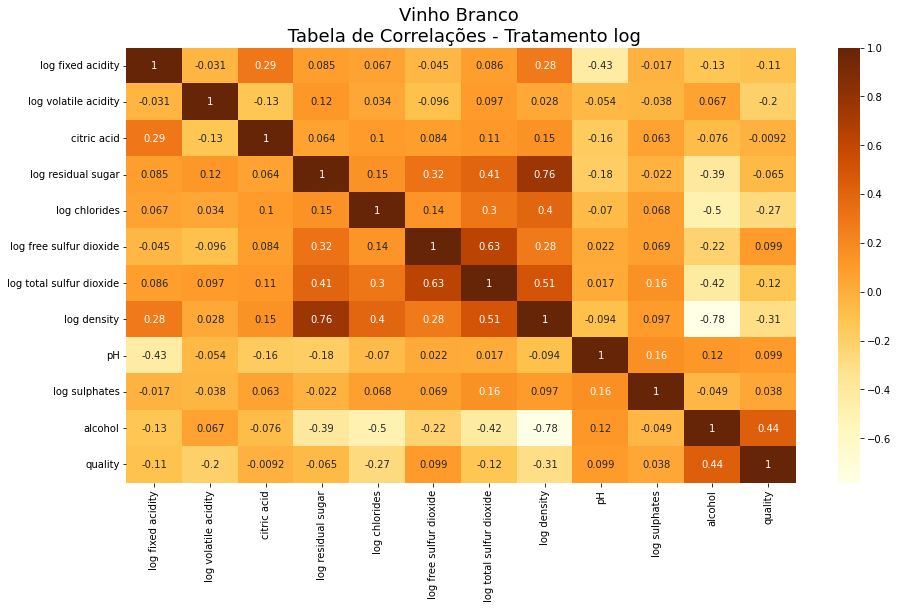

In [23]:
plt.figure(figsize = (15,8))
sns.heatmap(df_trat_white.corr(), annot=True, cmap="YlOrBr")
plt.plot()
plt.title('Vinho Branco \n Tabela de Correlações - Tratamento log',
          fontsize = 18)
plt.show()

In [24]:
# Tratamento Media 0 e Var 1
for mv in df_trat_white.columns[:-1]:
  df_trat_white[mv] -= df_trat_white[mv].mean()
  df_trat_white[mv] /= df_trat_white[mv].std()

df_trat_white.head()

,log fixed acidity,log volatile acidity,citric acid,log residual sugar,log chlorides,log free sulfur dioxide,log total sulfur dioxide,log density,pH,log sulphates,alcohol,quality
0,0.233483,0.083515,0.213258,1.680731,0.144667,0.679067,0.766246,2.327946,-1.246794,-0.265243,-1.393010,6
1,-0.633293,0.395086,0.047996,-1.096750,0.401763,-1.453422,0.013543,-0.007663,0.739953,0.115279,-0.824192,6
2,1.434211,0.191061,0.543783,0.488848,0.462756,-0.061466,-0.903074,0.360448,0.475053,-0.365662,-0.336633,6
3,0.465238,-0.390649,-0.117266,0.715098,0.910843,0.758487,1.033856,0.527637,0.011479,-0.791548,-0.499152,6
4,0.465238,-0.390649,-0.117266,0.715098,0.910843,0.758487,1.033856,0.527637,0.011479,-0.791548,-0.499152,6


In [25]:
print(df_trat_white.var())
print(df_trat_white.mean())

log fixed acidity           1.000000
log volatile acidity        1.000000
citric acid                 1.000000
log residual sugar          1.000000
log chlorides               1.000000
log free sulfur dioxide     1.000000
log total sulfur dioxide    1.000000
log density                 1.000000
pH                          1.000000
log sulphates               1.000000
alcohol                     1.000000
quality                     0.784356
dtype: float64
log fixed acidity           2.669250e-15
log volatile acidity       -2.364607e-16
citric acid                 2.321087e-17
log residual sugar         -3.191495e-17
log chlorides               5.338500e-16
log free sulfur dioxide     4.478972e-16
log total sulfur dioxide   -4.410065e-16
log density                -1.392652e-16
pH                         -1.195360e-15
log sulphates               1.646521e-16
alcohol                    -3.713739e-16
quality                     5.877909e+00
dtype: float64


## Teste e Treino

### Vinho Tinto

In [26]:
# Retirando parte dos dados para comparação dos modelos:
from sklearn.model_selection import train_test_split

Y = df_trat['quality'].to_numpy()
X = df_trat.drop('quality', axis=1)

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=479,
                                            random_state=42, shuffle=False)

print(f'Shape X_treino: {X_treino.shape}, \tShape Y_treino: {Y_treino.shape}')
print(f'Shape X_teste: {X_teste.shape}, \tShape Y_teste: {Y_teste.shape}')

Shape X_treino: (1120, 11), 	Shape Y_treino: (1120,)
Shape X_teste: (479, 11), 	Shape Y_teste: (479,)


### Vinho Branco

In [27]:
# Retirando parte dos dados para comparação dos modelos:
from sklearn.model_selection import train_test_split

Y = df_trat_white['quality'].to_numpy()
X = df_trat_white.drop('quality', axis=1)

X_treino_w, X_teste_w, Y_treino_w, Y_teste_w = train_test_split(X, Y, test_size=0.3,
                                            random_state=42, shuffle=False)

print(f'Shape X_treino: {X_treino_w.shape}, \tShape Y_treino: {Y_treino_w.shape}')
print(f'Shape X_teste: {X_teste_w.shape}, \tShape Y_teste: {Y_teste_w.shape}')

Shape X_treino: (3428, 11), 	Shape Y_treino: (3428,)
Shape X_teste: (1470, 11), 	Shape Y_teste: (1470,)


# Ridge & Lasso

##Vinho Tinto

### Mínimos Quadrados - Vinho Tinto

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_treino,Y_treino)

print('intercepto: ',reg.intercept_)
print('coeficientes: ',reg.coef_)

Y_predito = reg.predict(X_teste)
print('MSE: ', mean_squared_error(Y_teste,Y_predito))

intercepto:  5.666165282421334
coeficientes:  [ 0.13277432 -0.18375006 -0.08702293  0.05405115 -0.06459073  0.04995292
 -0.12063565 -0.08967088 -0.01603603  0.1575086   0.27226714]
MSE:  0.44153946905460423


In [ ]:
from sklearn.metrics import mean_squared_error
Y_predito = reg.predict(X_teste)
print(mean_squared_error(Y_teste,Y_predito))

0.44153946905460423


In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, SCORERS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

reg_res = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(reg, X_teste, Y_teste,
                         scoring='neg_mean_squared_error',
                         cv=reg_res, n_jobs=-1)

print('Erros no conjunto de teste', -round(np.mean(scores),4))

Erros no conjunto de teste 0.4122


In [ ]:

X_t = np.c_[X_teste, np.ones(X_teste.shape[0])]  
linreg = np.linalg.lstsq(X_t, Y_teste, rcond=None)[0]
print(linreg)

[-0.08779613 -0.13478044  0.00795984 -0.03704375 -0.09929466  0.14967983
 -0.09500995 -0.01386391 -0.19887106  0.24625965  0.2940452   5.53120179]


###Ridge Regularization - Vinho Tinto

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, SCORERS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#Teste de hiperparâmetros usando kfold e crossvalidation
# Métrica = r2
def ridge_tuning_a(x,y):
  metric = []
  for i in range(0,201,1):
    clf = Ridge(alpha= i)
    clf.fit(x, y)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, x, y,
                             scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    metric.append(np.mean(scores))
  
  lambda_min_index = metric.index(max(metric))

  return metric, lambda_min_index


def ridge_tuning_b(X_train, X_val, y_train, y_val):
  metric = []
  for i in range(0,11,1):
    clf = Ridge(alpha= i*0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    metric.append(error)
  
  return metric


#ridge_errors = ridge_tuning_b(X_train, X_val, y_train, y_val)
ridge_errors, lambda_min = ridge_tuning_a(X_treino, Y_treino)
print('Lambda de menor erro', lambda_min)

Lambda de menor erro 51


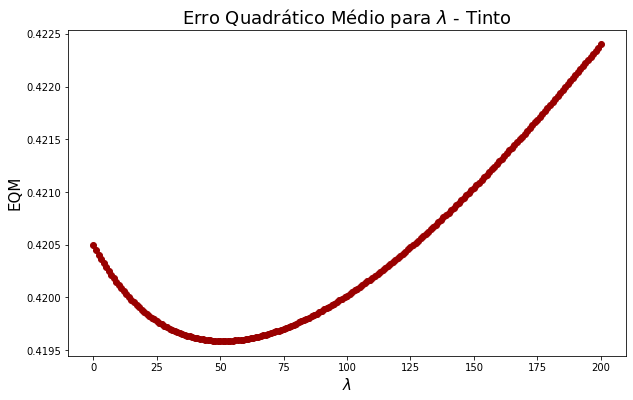

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(np.arange(0,201), np.abs(ridge_errors), color='#990000' )
plt.xlabel(r'$\lambda$', fontsize=15)
plt.ylabel('EQM', fontsize=15)
plt.title(r'Erro Quadrático Médio para $\lambda$ - Tinto', fontsize=18)
plt.show()

### Modelo com melhor $\lambda$ - Vinho Tinto

In [ ]:
clf = Ridge(alpha = lambda_min)
clf.fit(X_treino, Y_treino)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X_teste, Y_teste,
                         scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Erros no conjunto de teste', -round(np.mean(scores),4))

Erros no conjunto de teste 0.4108


In [ ]:
# conferindo os valores \beta's:
covs  = clf.feature_names_in_
betas = clf.coef_

print('Intercepto:', round(clf.intercept_, 4))
for i in range(0, len(covs)):
  print(f'{covs[i]}: {betas[i]:.4f}', end='\n')

Intercepto: 5.6658
log fixed acidity: 0.1071
log volatile acidity: -0.1724
citric acid: -0.0621
log residual sugar: 0.0488
log chlorides: -0.0672
log free sulfur dioxide: 0.0418
log total sulfur dioxide: -0.1149
log density: -0.0794
pH: -0.0193
log sulphates: 0.1513
alcohol: 0.2649


###Lasso Regularization - Vinho Tinto

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

#Teste de hiperparâmetros usando kfold e crossvalidation
# Métrica = r2
def lasso_tuning_a(x,y):
  metric = []
  for i in range(1,101,1):
    clf = Lasso(alpha= i*0.001, fit_intercept = False)
    clf.fit(x,y)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, x, y,
                             scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    metric.append(np.mean(scores))

  alpha_min = range(1,101)[metric.index(max(metric))]*0.001
  return metric, alpha_min

lasso_errors, alpha_min = lasso_tuning_a(X_treino, Y_treino)
print('Alpha de menor erro', alpha_min)

Alpha de menor erro 0.041


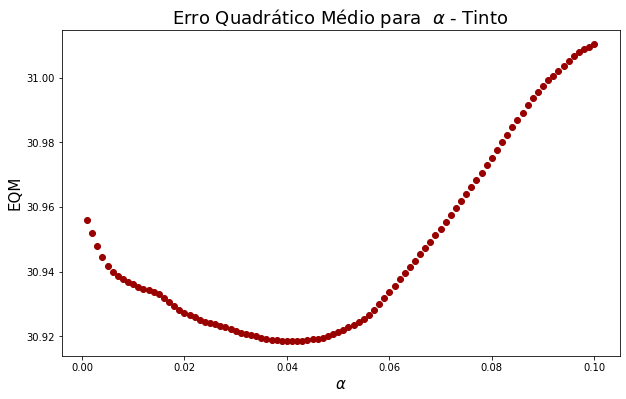

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(np.arange(1,101)*0.001, np.abs(lasso_errors), color='#990000')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel(r'EQM', fontsize=15)
plt.title(r'Erro Quadrático Médio para  $\alpha$ - Tinto', fontsize=18)
plt.show()

### Modelo com melhor $\alpha$ - Vinho Tinto


In [ ]:
clf_lasso = Lasso(alpha= 0.041)
clf_lasso.fit(X_treino,Y_treino)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf_lasso, X_teste,Y_teste,
                         scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Erros conjunto de teste', -round(np.mean(scores),4))

Erros conjunto de teste 0.4213


In [ ]:
# conferindo os valores \beta's:
covs  = clf_lasso.feature_names_in_
betas = clf_lasso.coef_

print('Intercepto:', round(clf_lasso.intercept_, 4))
for i in range(0, len(covs)):
  print(f'{covs[i]}: {betas[i]:.4f}', end='\n')

Intercepto: 5.6638
log fixed acidity: 0.0132
log volatile acidity: -0.1571
citric acid: 0.0000
log residual sugar: 0.0000
log chlorides: -0.0247
log free sulfur dioxide: -0.0000
log total sulfur dioxide: -0.0559
log density: -0.0000
pH: -0.0000
log sulphates: 0.0995
alcohol: 0.2944


In [ ]:
df = pd.DataFrame(clf_lasso.coef_, clf_lasso.feature_names_in_,
                  columns = ['Coeficientes'])
df['Coeficientes'] != 0

log fixed acidity            True
log volatile acidity         True
citric acid                 False
log residual sugar          False
log chlorides                True
log free sulfur dioxide     False
log total sulfur dioxide     True
log density                 False
pH                          False
log sulphates                True
alcohol                      True
Name: Coeficientes, dtype: bool

##Vinho Branco

### Mínimos Quadrados

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_treino_w,Y_treino_w)

print('intercepto: ',reg.intercept_)
print('coeficientes: ',reg.coef_)

Y_predito_w = reg.predict(X_teste_w)
print('MSE: ', mean_squared_error(Y_teste_w,Y_predito_w))

intercepto:  5.9197371680901005
coeficientes:  [-0.01469738 -0.16451996 -0.00074587  0.18826619 -0.03480881  0.16921927
 -0.0496654  -0.15212031  0.05383308  0.0749722   0.38972762]
MSE:  0.5008156926845704


### Ridge Regularization - Vinho Branco

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, SCORERS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#Teste de hiperparâmetros usando kfold e crossvalidation
# Métrica = r2
def ridge_tuning_a(x,y):
  metric = []
  for i in range(0,201,1):
    clf = Ridge(alpha= i)
    clf.fit(x, y)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, x, y,
                             scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    
    metric.append(np.mean(scores))
  

  lambda_min_index = metric.index(max(metric))
  return metric, lambda_min_index

ridge_errors, lambda_min = ridge_tuning_a(X_treino_w, Y_treino_w)
print(r'O valor de $\lambda$ que miniminiza os erros =', round(lambda_min, 4))

O valor de $\lambda$ que miniminiza os erros = 114


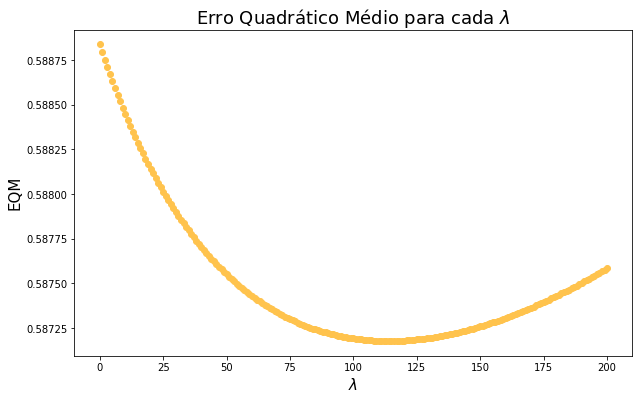

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(np.arange(0,201,1), np.abs(ridge_errors), color='#ffc34d')
plt.xlabel(r'$\lambda$', fontsize=15)
plt.ylabel('EQM', fontsize=15)
plt.title(r'Erro Quadrático Médio para cada $\lambda$', fontsize=18)
plt.show()

### Modelo com melhor $\lambda$ - Vinho Branco

In [ ]:
clf = Ridge(alpha= lambda_min)
clf.fit(X_treino_w, Y_treino_w)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X_teste_w, Y_teste_w,
                         scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Erros conjunto de teste', -round(np.mean(scores),4))

Erros conjunto de teste 0.4596


In [ ]:
# conferindo os valores \beta's:
covs  = clf.feature_names_in_
betas = clf.coef_

print('Intercepto:', round(clf.intercept_, 4))
for i in range(0, len(covs)):
  print(f'{covs[i]}: {betas[i]:.4f}', end='\n')

Intercepto: 5.9169
log fixed acidity: -0.0176
log volatile acidity: -0.1580
citric acid: 0.0009
log residual sugar: 0.1687
log chlorides: -0.0436
log free sulfur dioxide: 0.1631
log total sulfur dioxide: -0.0456
log density: -0.1419
pH: 0.0517
log sulphates: 0.0709
alcohol: 0.3716


###Lasso Regularization - Vinho Branco

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

#Teste de hiperparâmetros usando kfold e crossvalidation
# Métrica = r2
def lasso_tuning_a(x,y):
  metric = []
  for i in range(1,101,1):
    clf = Lasso(alpha= i*0.0001)
    clf.fit(x,y)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, x,y,
                             scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    metric.append(np.mean(scores))

  alpha_min = range(1,101)[metric.index(max(metric))]*0.0001
  return metric, alpha_min

lasso_errors, alpha_min = lasso_tuning_a(X_treino_w, Y_treino_w)
print('Alpha com menor erro', alpha_min)

Alpha com menor erro 0.0048000000000000004


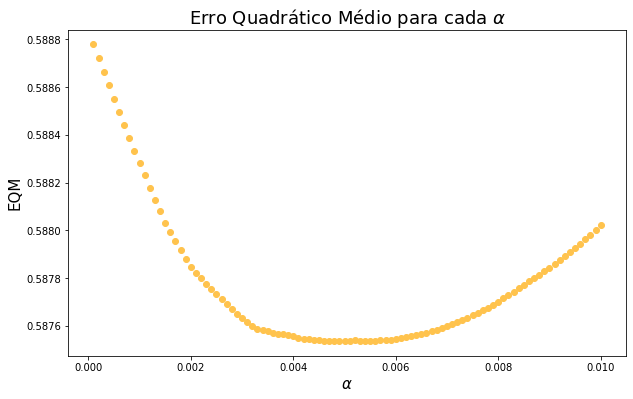

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(np.arange(1,101)*0.0001, np.abs(lasso_errors), color='#ffc34d')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel(r'EQM', fontsize=15)
plt.title(r'Erro Quadrático Médio para cada $\alpha$', fontsize=18)
plt.show()

### Modelo com melhor $\alpha$ - Vinho Branco

In [ ]:
clf_lasso = Lasso(alpha= alpha_min)
clf_lasso.fit(X_treino_w,Y_treino_w)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf_lasso, X_teste_w,Y_teste_w,
                         scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Erros conjunto de teste', -round(np.mean(scores),4))

Erros conjunto de teste 0.4575


In [ ]:
# conferindo os valores \beta's:
covs  = clf_lasso.feature_names_in_
betas = clf_lasso.coef_

print('Intercepto:', round(clf_lasso.intercept_, 4))
for i in range(0, len(covs)):
  print(f'{covs[i]}: {betas[i]:.4f}', end='\n')

Intercepto: 5.9175
log fixed acidity: -0.0209
log volatile acidity: -0.1619
citric acid: -0.0000
log residual sugar: 0.1570
log chlorides: -0.0354
log free sulfur dioxide: 0.1608
log total sulfur dioxide: -0.0376
log density: -0.1148
pH: 0.0451
log sulphates: 0.0662
alcohol: 0.4038


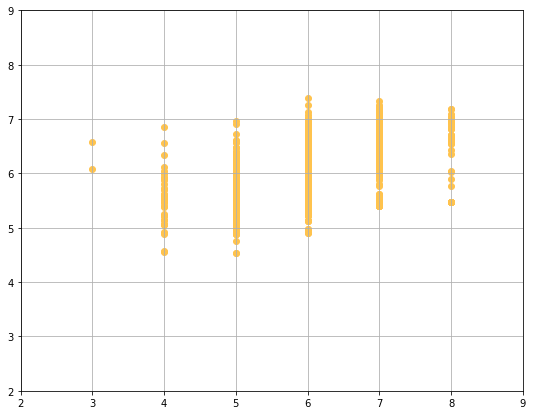

In [ ]:
plt.figure(figsize=(9,7))

y_pred = clf_lasso.predict(X_teste_w)

plt.scatter(Y_teste_w, y_pred, color='#ffc34d')
plt.xticks(np.arange(2,10))
plt.yticks(np.arange(2,10))
plt.grid(True)

plt.show()

In [ ]:
df_res = pd.DataFrame(clf_lasso.coef_,
                      clf_lasso.feature_names_in_,
                      columns = ['Coeficientes'])
df_res['Coeficientes'] != 0

log fixed acidity            True
log volatile acidity         True
citric acid                 False
log residual sugar           True
log chlorides                True
log free sulfur dioxide      True
log total sulfur dioxide     True
log density                  True
pH                           True
log sulphates                True
alcohol                      True
Name: Coeficientes, dtype: bool

#Bibliografia


- **Fixed Acidity** - https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
- **Database** - https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
- **Refpaper** - https://reader.elsevier.com/reader/sd/pii/S0167923609001377?token=ED175ABE9BAE061960A95120FC3A32A315241073D060C3BBDA40F69ABFB2A8EEEF274842BBA0780C724354E8410958BA&originRegion=us-east-1&originCreation=20220522150509
- **Refcod** - https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/